Shubhasmita Roy


# Exp 6: Cosine Similarity in Natural Language Processing


In this Exp, I will be exploring Cosine Similarity, Improving the model with TF-IDF and GloVe to measure similarity between 2 documents. Also I will be exploring the application of Plagiarism Checker using the final Cosine model.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Cosine Similarity Calculation

In [ ]:
def cosine_similarity(vector1, vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    return np.dot(vector1, vector2) / (np.sqrt(np.sum(vector1**2)) * np.sqrt(np.sum(vector2**2)))

## Text

In [ ]:
text2 = (""" Trigonometry is a branch of mathematics that studies relationships between side lengths and angles of triangles The field emerged in the Hellenistic world during the 3rd century BC from applications""", 
        """ Driven by the demands of navigation and the growing need for accurate maps of large geographic areas trigonometry grew into a major branch of mathematics Bartholomaeus Pitiscus was the first""", 
        """ One of Los Angeles oldest continuing operating restaurants The Apple Pan is also notable as the basis for the popular Johnny Rockets restaurant chain Johnny Rockets founder Ronn Teitlebaum claimed""")

In [ ]:
text = ("""The best Italian restaurant enjoy the best pasta""",
        """American restaurant enjoy the best hamburger""",
        """Korean restaurant enjoy th best bibimbap""",
        """The best the best American restaurant""")

In [ ]:
corpus = pd.Series(text)
print(corpus)

0    The best Italian restaurant enjoy the best pasta
1        American restaurant enjoy the best hamburger
2            Korean restaurant enjoy th best bibimbap
3               The best the best American restaurant
dtype: object


## Converting our text corpus into a suitable mathematical representation

In [ ]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus) # sparse matrix that contains the representation we need

In [ ]:
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [ ]:
print(bow_matrix)

  (0, 10)	2
  (0, 1)	2
  (0, 5)	1
  (0, 8)	1
  (0, 3)	1
  (0, 7)	1
  (1, 10)	1
  (1, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 0)	1
  (1, 4)	1
  (2, 1)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 9)	1
  (2, 2)	1
  (3, 10)	2
  (3, 1)	2
  (3, 8)	1
  (3, 0)	1


## Checking the words in our vocabulary

In [ ]:
feature_names_count = vectorizer.get_feature_names()
feature_names_count

['american',
 'best',
 'bibimbap',
 'enjoy',
 'hamburger',
 'italian',
 'korean',
 'pasta',
 'restaurant',
 'th',
 'the']

## Corpus representation

In [ ]:
# mathematical representation of the three documents
features_array_count = bow_matrix.toarray()
features_array_count

array([[0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2],
       [1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2]])

In [ ]:
bow_matrix.shape

(4, 11)

In [ ]:
for i in range(bow_matrix.shape[0]):
    for j in range(i + 1, bow_matrix.shape[0]):
        print("The cosine similarity between the documents ", i, "and", j, "is: ",
              cosine_similarity(bow_matrix.toarray()[i], bow_matrix.toarray()[j]))

The cosine similarity between the documents  0 and 1 is:  0.7071067811865476
The cosine similarity between the documents  0 and 2 is:  0.47140452079103173
The cosine similarity between the documents  0 and 3 is:  0.8215838362577491
The cosine similarity between the documents  1 and 2 is:  0.5000000000000001
The cosine similarity between the documents  1 and 3 is:  0.7745966692414834
The cosine similarity between the documents  2 and 3 is:  0.3872983346207417


### **Inference**
We can observe that sentence indexed 0 and 3 match the most, when infact if we go by the context 1 and 3 should match the most:

0 - The best Italian restaurant enjoy the best pasta

1 - American restaurant enjoy the best hamburger

3 - The best the best American restaurant

The context is about American restaurants. But cosine similarity is matching sentences according to the presence of frequently occuring words "the" and "best". 

## Using TF-IDF to vectorize sentences before finding Cosine similarity

In [ ]:
vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
tfidf = vect.fit_transform(corpus)

for i in range(tfidf.shape[0]):
    for j in range(i + 1, tfidf.shape[0]):
        print("The cosine similarity between the documents ", i, "and", j, "is: ",
              cosine_similarity(tfidf.toarray()[i], tfidf.toarray()[j]))

The cosine similarity between the documents  0 and 1 is:  0.3931190557742943
The cosine similarity between the documents  0 and 2 is:  0.3172392607969096
The cosine similarity between the documents  0 and 3 is:  0.49802633761690057
The cosine similarity between the documents  1 and 2 is:  0.2985201157582191
The cosine similarity between the documents  1 and 3 is:  0.6367498944433695
The cosine similarity between the documents  2 and 3 is:  0.29181373579775055


### **Inference**
We can observe that the similarity of sentences indexed 1 and 3 are the highest now at 0.63, just as we should expect them to be most similar by context. So we have improved our algo, by reducing the effect of frequency of occurance of words in document similarity.

## Testing on other sentences

In [ ]:
text1=("""The Prime Minister greets the press at Delhi""",
       """Modi speaks to media in the Capital""")

In [ ]:
corpus = pd.Series(text1)
print(corpus)
vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
tfidf = vect.fit_transform(corpus)

for i in range(tfidf.shape[0]):
    for j in range(i + 1, tfidf.shape[0]):
        print("The cosine similarity between the documents ", i, "and", j, "is: ",
              cosine_similarity(tfidf.toarray()[i], tfidf.toarray()[j]))

0    The Prime Minister greets the press at Delhi
1             Modi speaks to media in the Capital
dtype: object
The cosine similarity between the documents  0 and 1 is:  0.0


### **Inference**
Similarity of these 2 texts should be as high as possible since the 2 sentences mean the same, but our algo is not able to identify this.

## Using CountVectorizer Method

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
t1="The prime minister greets the press at Delhi"
t2="Modi speaks to media in the Capital"

In [ ]:
!git clone https://github.com/stanfordnlp/glove

Cloning into 'glove'...
remote: Enumerating objects: 601, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 601 (delta 4), reused 7 (delta 2), pack-reused 592
Receiving objects: 100% (601/601), 222.99 KiB | 4.65 MiB/s, done.
Resolving deltas: 100% (342/342), done.


In [ ]:
gloveFile = "/content/drive/MyDrive/Colab Notebooks/glove.6B.50d.txt"
import numpy as np
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

import re
from nltk.corpus import stopwords
import pandas as pd

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

Loading Glove Model
Done. 400000  words loaded!
Word Embedding method with a cosine distance asses that our two sentences are similar to 74.83 %
None


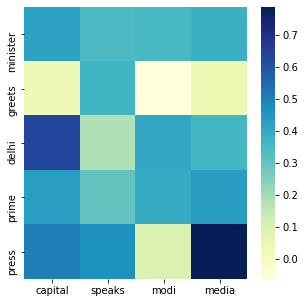

In [ ]:
model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(t1,t2)

### **Inference**
We can observe that the accuracy of the model improved, similarity between the 2 sentences were 0 improved to 74.83%. The algo detected the phrases "prime minister" and "Modi"; "press" and "media"; and "Delhi" and "Capital" as synonyms. This is what is expected from an intelligent sentence similarity checking algorithm - to recognise the context and measure similarity accordingly. 

# Testing on previous sentences
0 - The best Italian restaurant enjoy the best pasta

1 - American restaurant enjoy the best hamburger

3 - The best the best American restaurant

Earlier, we observed that sentence indexed 0 and 3 match the most, when infact if we go by the context 1 and 3 should match the most. This was corrected by TF-IDF algo, however we will also test on the improved algo to acertain that the model is intelligent NLP model.

In [ ]:
s1 = 'The best Italian restaurant enjoy the best pasta'
s2 = 'American restaurant enjoy the best hamburger'
s3 = 'The best the best American restaurant'

Loading Glove Model
Done. 400000  words loaded!
Word Embedding method with a cosine distance asses that our two sentences are similar to 85.24 %
None


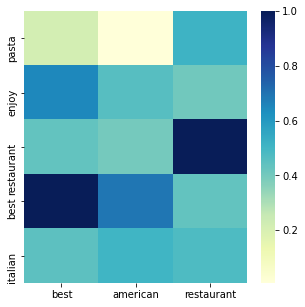

In [ ]:
model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(s1,s3)

Loading Glove Model
Done. 400000  words loaded!
Word Embedding method with a cosine distance asses that our two sentences are similar to 94.95 %
None


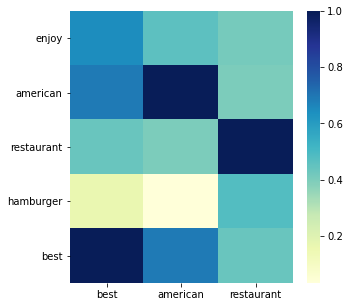

In [ ]:
model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(s2,s3)

## **Conclusion**
We initially built measuring document similarity model by calculating only Cosine distance between sentences. We observed that this method only looks at the frequency of words to measure similarity, thus it was not considered the best model ro measure similarity.

To improve the model, we added calculating TF-IDF to vectorize sentences before finding cosine similarity, this helped improve the model by reducing the effect of frequency of occurance of words in document similarity.

However, the model failed to find similarity between the following sentences which have the same meaning:

t1 = 'The Prime Minister greets the press at Delhi'

t2 = 'Modi speaks to media in the Capital'

We made use of GloVe model to improve our alogorithm. GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Similarity of sentences t1 and t2 is improved to 74.83% using GloVe Model along with Cosine similarity. This is a good estimation, since the 2 sentences imply the same thing. 

We also tested the model on :

s1 = 'The best Italian restaurant enjoy the best pasta'

s2 = 'American restaurant enjoy the best hamburger'

s3 = 'The best the best American restaurant'

We can observe that s1 and s3 are 85.24 % similar and s2 and s3 are 94.95 % similar. It has matched our expectations and performs well just like TF-IDF Cosine similarity model.

Thus we built a good model that understands context of the sentences to measure similarity. 

# **APPLICATION -**
# **Plagiarism Detection Using NLP**
Plagiarism is widely acknowledged to be a significant and increasing problem for higher education institutions. To test and develop systems to detect plagiarism, evaluation resources are required. 

World Wide Web has increased sharing of knowledge and resources all across the world. However, this has also resulted in plagiarism across different domains. Academic literature is highly prone to plagiarism, where ideas and work are stolen and replicated without proper acknowledgment.

Natural Language Processing technologies can be used to effectively to detect plagiarism in texts. Here, we see NLP applied to detect external plagiarism, i.e when both the original text as well as the suspicious text are available to us. 

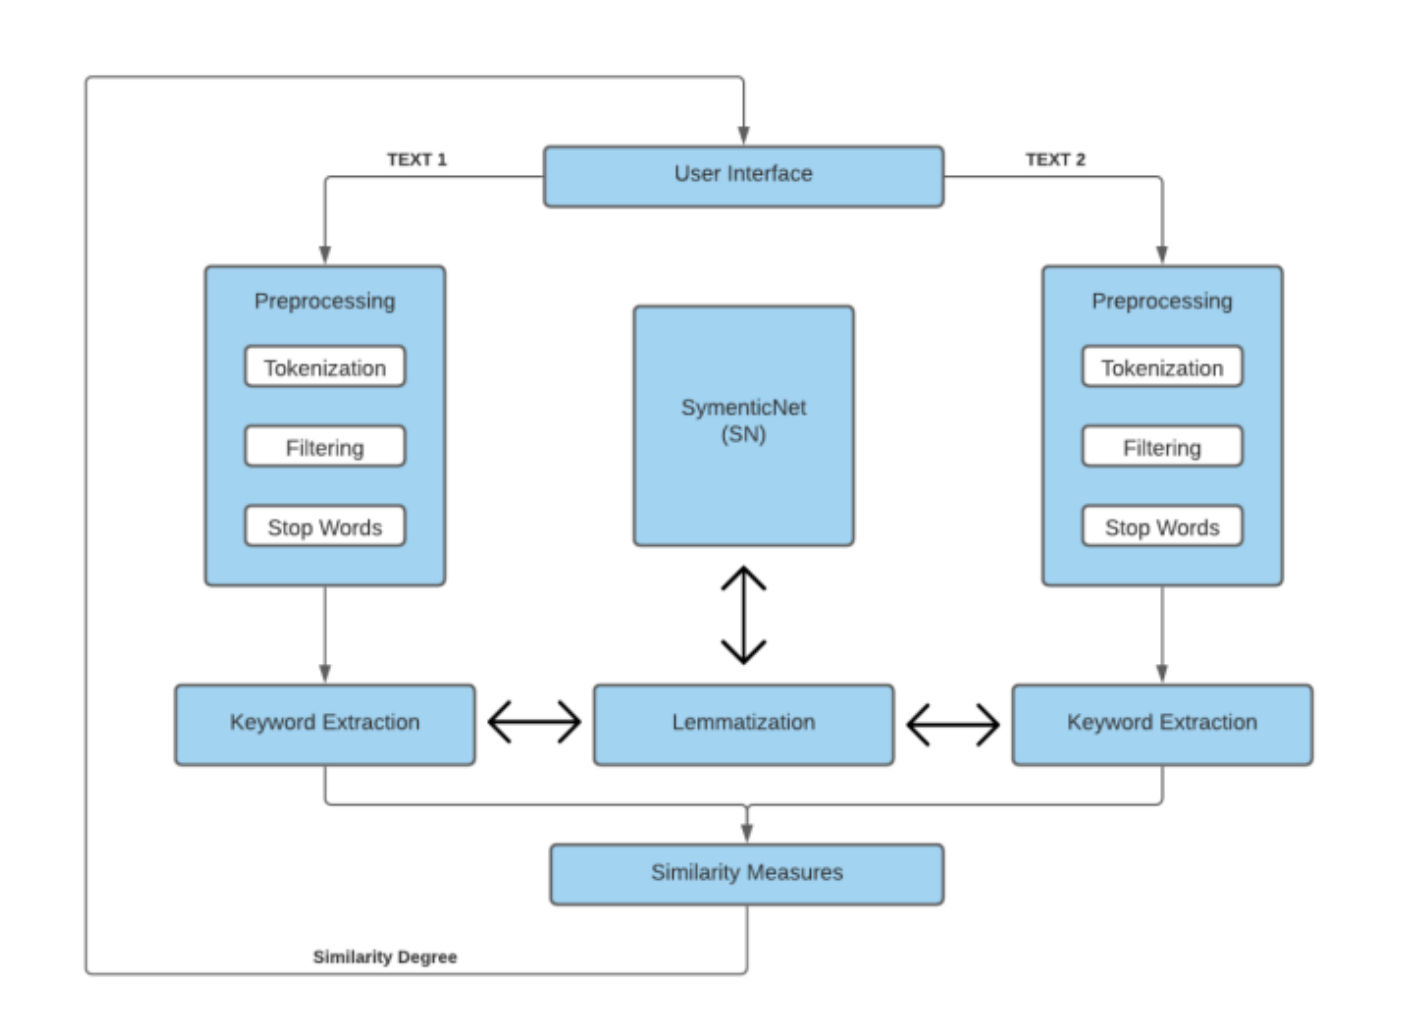

In [ ]:
# Importing statements
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Reading original and susicious text files
f=open('/content/drive/MyDrive/Colab Notebooks/original.txt',"r")
orig=f.read().replace("\n"," ")
f.close()

f2=open('/content/drive/MyDrive/Colab Notebooks/suspicious.txt',"r")
plag=f2.read().replace("\n"," ")
f2.close()

We do the pre-processing of both the texts. Word tokenization splits the sentences into words. For example, ‘I love books.’ tokenizes to ‘I’, ‘love’, ‘books’ and ‘.’. We change all the uppercase alphabets to lowercase to generalize tokens across both the texts. Further, Stop-Words like ‘or’, ‘the’ and ‘in’ and punctuations are removed, as these are functional in nature and do not give any extra information about the document.

In [ ]:
#word tokenisation
tokens_o=word_tokenize(orig)
tokens_p=word_tokenize(plag)

#lowerCase
tokens_o = [token.lower() for token in tokens_o]
tokens_p = [token.lower() for token in tokens_p]

#stop word removal
#punctuation removal
stop_words=set(stopwords.words('english'))
punctuations=['"','.','(',')',',','?',';',':',"''",'``']
filtered_tokens_o = [w for w in tokens_o if not w in stop_words and not w in punctuations]
filtered_tokens_p = [w for w in tokens_p if not w in stop_words and not w in punctuations]

Tools such as Ferret tools use n-gram measures to find the plagiarised text in the suspicious document. Here, we find the number of overlapping trigrams in the two texts, i.e the number of continuous sequences of three words which are present in both texts.
The plagiarism content between the two texts is found by calculating the Jaccard similarity coefficient,
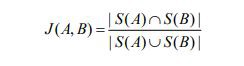

S(A) and S(B) represent the sets of trigrams in the suspicious and original documents respectively. Their intersection is the set of matching trigrams in those documents, while their union is the set of all trigrams in those documents.
The containment measure C is a better metric for or document pairs with varied document lengths. Here, we normalize by the trigrams in the suspicious document only. C is given by,
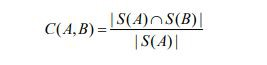

In [ ]:
#Trigram Similiarity measures
trigrams_o=[]
for i in range(len(tokens_o)-2):
    t=(tokens_o[i],tokens_o[i+1],tokens_o[i+2])
    trigrams_o.append(t)

s=0
trigrams_p=[]
for i in range(len(tokens_p)-2):
    t=(tokens_p[i],tokens_p[i+1],tokens_p[i+2])
    trigrams_p.append(t)
    if t in trigrams_o:
        s+=1

#jaccord coefficient = (S(o)^S(p))/(S(o) U S(p))
J=s/(len(trigrams_o)+len(trigrams_p)) 
print(J)

#containment measure
C=s/len(trigrams_p)
print(C)

0.006329113924050633
0.014354066985645933


**Longest Common Subsequence (LCS)** - Unlike n-grams, the overlap does not have to be in the form of sequential words for LCS. So, it gives a better estimate of plagiarised content. LCS is applied at the sentence level, that is, we computed the longest common subsequence for all pairs of sentences in both texts.

In [ ]:
#longest common subsequence
#dynamic programming algorithm for finding lcs
def lcs(l1,l2):
    s1=word_tokenize(l1)
    s2=word_tokenize(l2)
    # storing the dp values 
    dp = [[None]*(len(s1)+1) for i in range(len(s2)+1)] 
  
    for i in range(len(s2)+1): 
        for j in range(len(s1)+1): 
            if i == 0 or j == 0: 
                dp[i][j] = 0
            elif s2[i-1] == s1[j-1]: 
                dp[i][j] = dp[i-1][j-1]+1
            else: 
                dp[i][j] = max(dp[i-1][j] , dp[i][j-1]) 
    return dp[len(s2)][len(s1)] 

In [ ]:
sent_o=sent_tokenize(orig)
sent_p=sent_tokenize(plag)

#maximum length of LCS for a sentence in suspicious text
max_lcs=0
sum_lcs=0

for i in sent_p:
    for j in sent_o:
        l=lcs(i,j)
        max_lcs=max(max_lcs,l)
    sum_lcs+=max_lcs
    max_lcs=0

score=sum_lcs/len(tokens_p)
print(score)

0.2559241706161137


There is only 25.59% chance that the 2nd document is plagiarized copy of 1st document.